<a href="https://colab.research.google.com/github/javierloren/GeoScientist/blob/main/Pile_driving_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [5]:
data = pd.read_csv('/content/drive/MyDrive/isfog2020-pile-driving-predictions/training_data.csv')
data.head()

,z [m],qc [MPa],fs [MPa],u2 [MPa],ID,Location ID,Blowcount [Blows/m],Normalised ENTRHU [-],Normalised hammer energy [-],Number of blows,Diameter [m],Bottom wall thickness [mm],Pile penetration [m]
0,0.5,5.150400,0.031200,0.006400,EK__0_5,EK,NaN,NaN,NaN,NaN,2.48,50.0,31.0
1,1.0,11.681000,0.082700,0.015400,EK__1_0,EK,NaN,NaN,NaN,NaN,2.48,50.0,31.0
2,1.5,11.107600,0.101300,0.019100,EK__1_5,EK,NaN,NaN,NaN,NaN,2.48,50.0,31.0
3,2.0,10.449700,0.127000,0.030200,EK__2_0,EK,NaN,NaN,NaN,NaN,2.48,50.0,31.0
4,2.5,10.585762,0.113588,-0.116242,EK__2_5,EK,NaN,NaN,NaN,NaN,2.48,50.0,31.0


In [6]:
data.describe()

,z [m],qc [MPa],fs [MPa],u2 [MPa],Blowcount [Blows/m],Normalised ENTRHU [-],Normalised hammer energy [-],Number of blows,Diameter [m],Bottom wall thickness [mm],Pile penetration [m]
count,7374.000000,7374.000000,7374.000000,7374.000000,4610.000000,4610.000000,4610.000000,4610.000000,5322.00,5322.000000,5322.000000
mean,20.004475,42.151491,0.512513,0.174952,65.207047,0.372894,0.496754,670.706765,2.48,55.101466,28.596017
std,11.455214,24.486027,0.439347,0.162194,29.828039,0.167413,0.223039,540.760135,0.00,7.719052,2.493044
min,0.500000,0.286700,-0.003936,-0.509725,4.000000,0.078542,0.120833,1.500000,2.48,50.000000,25.000000
25%,10.000000,23.692669,0.185170,0.071147,44.000000,0.207796,0.274354,167.625000,2.48,50.000000,27.000000
50%,20.000000,39.541200,0.370535,0.173601,72.000000,0.400283,0.536625,581.000000,2.48,50.000000,28.000000
75%,29.500000,60.074400,0.725500,0.297250,86.000000,0.523750,0.698333,1086.000000,2.48,55.000000,31.000000
max,50.000000,110.043927,2.392300,1.911925,176.000000,0.739583,0.893583,2332.000000,2.48,70.000000,34.000000


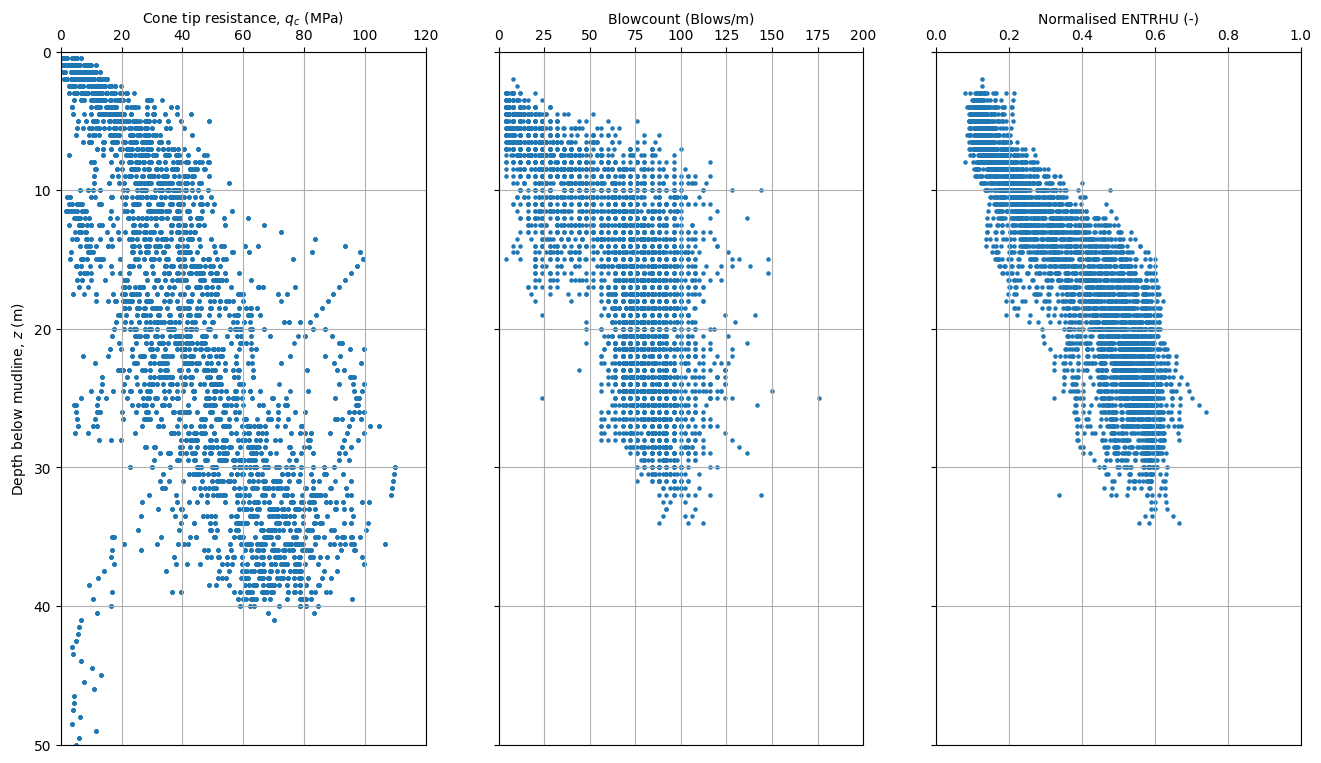

In [7]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharey=True, figsize=(16,9))
ax1.scatter(data["qc [MPa]"], data["z [m]"], s=5)   # Create the cone tip resistance vs depth plot
ax2.scatter(data["Blowcount [Blows/m]"], data["z [m]"], s=5)  # Create the Blowcount vs depth plot
ax3.scatter(data["Normalised ENTRHU [-]"], data["z [m]"], s=5) # Create the ENTHRU vs depth plot
# Format the axes (position, labels and ranges)
for ax in (ax1, ax2, ax3):
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.grid()
    ax.set_ylim(50, 0)
ax1.set_xlabel(r"Cone tip resistance, $ q_c $ (MPa)")
ax1.set_xlim(0, 120)
ax2.set_xlabel(r"Blowcount (Blows/m)")
ax2.set_xlim(0, 200)
ax3.set_xlabel(r"Normalised ENTRHU (-)")
ax3.set_xlim(0, 1)
ax1.set_ylabel(r"Depth below mudline, $z$ (m)")
# Show the plot
plt.show()

In [8]:
# Select the data where the column 'Location ID' is equal to the location name
location_data = data[data["Location ID"] == "EK"]

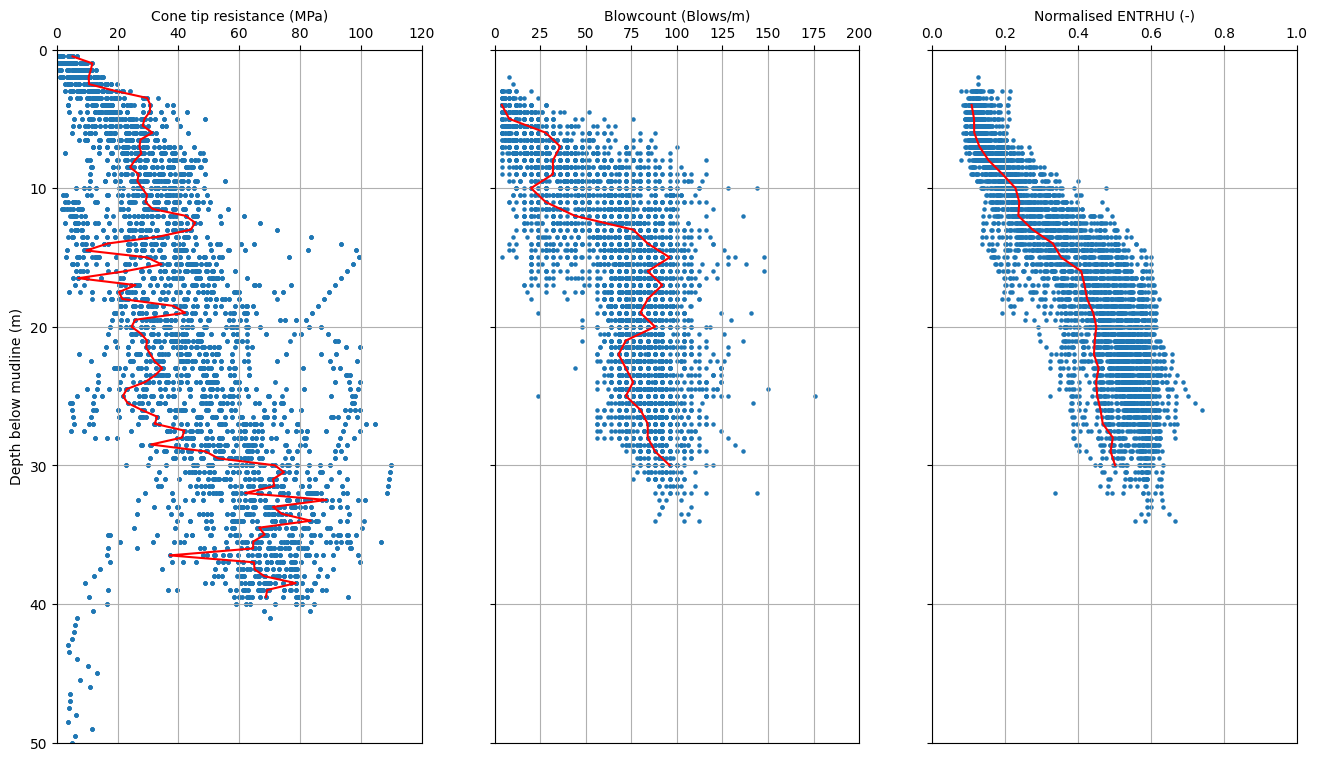

In [9]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharey=True, figsize=(16,9))
# All data
ax1.scatter(data["qc [MPa]"], data["z [m]"], s=5)
ax2.scatter(data["Blowcount [Blows/m]"], data["z [m]"], s=5)
ax3.scatter(data["Normalised ENTRHU [-]"], data["z [m]"], s=5)
# Location-specific data
ax1.plot(location_data["qc [MPa]"], location_data["z [m]"], color='red')
ax2.plot(location_data["Blowcount [Blows/m]"], location_data["z [m]"], color='red')
ax3.plot(location_data["Normalised ENTRHU [-]"], location_data["z [m]"], color='red')
for ax in (ax1, ax2, ax3):
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.grid()
    ax.set_ylim(50, 0)
ax1.set_xlabel(r"Cone tip resistance (MPa)")
ax1.set_xlim(0, 120)
ax2.set_xlabel(r"Blowcount (Blows/m)")
ax2.set_xlim(0, 200)
ax3.set_xlabel(r"Normalised ENTRHU (-)")
ax3.set_xlim(0, 1)
ax1.set_ylabel(r"Depth below mudline (m)")
plt.show()

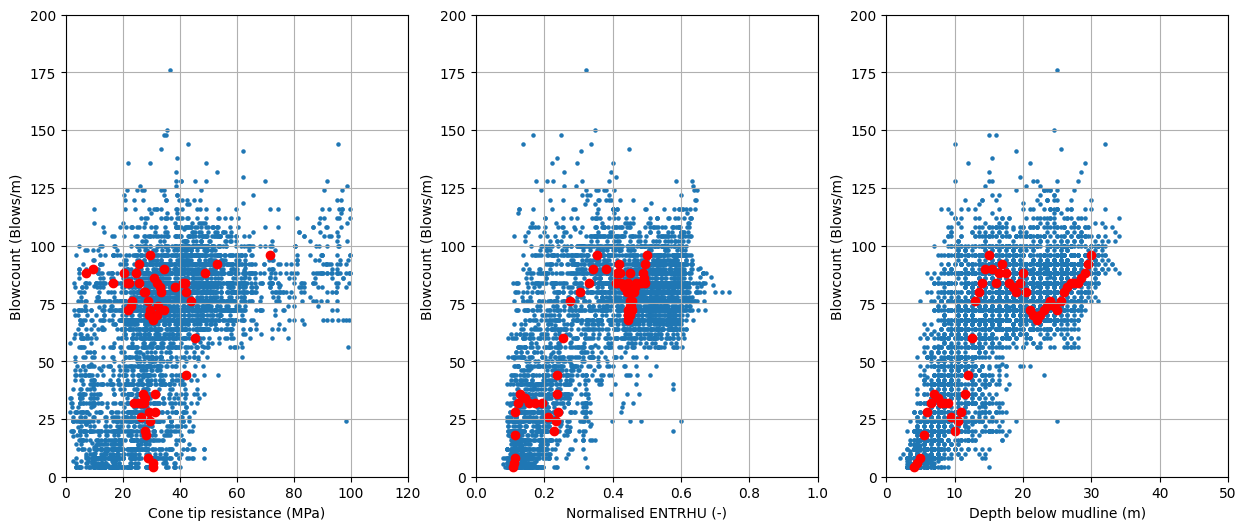

In [10]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15,6))
# All data
ax1.scatter(data["qc [MPa]"], data["Blowcount [Blows/m]"], s=5)
ax2.scatter(data["Normalised ENTRHU [-]"], data["Blowcount [Blows/m]"], s=5)
ax3.scatter(data["z [m]"], data["Blowcount [Blows/m]"], s=5)
# Location-specific data
ax1.scatter(location_data["qc [MPa]"], location_data["Blowcount [Blows/m]"], color='red')
ax2.scatter(location_data["Normalised ENTRHU [-]"], location_data["Blowcount [Blows/m]"], color='red')
ax3.scatter(location_data["z [m]"], location_data["Blowcount [Blows/m]"], color='red')
for ax in (ax1, ax2, ax3):
    ax.grid()
    ax.set_ylim(0, 200)
    ax.set_ylabel(r"Blowcount (Blows/m)")
ax1.set_xlabel(r"Cone tip resistance (MPa)")
ax1.set_xlim(0, 120)
ax2.set_xlabel(r"Normalised ENTRHU (-)")
ax2.set_xlim(0, 1)
ax3.set_xlabel(r"Depth below mudline (m)")
ax3.set_xlim(0, 50)
plt.show()

In [11]:
validation_ids = ['EL', 'CB', 'AV', 'BV', 'EF', 'DL', 'BM']
# Training data - ID not in validation_ids
training_data = data[~data['Location ID'].isin(validation_ids)]
# Validation data - ID in validation_ids
validation_data = data[data['Location ID'].isin(validation_ids)]

In [12]:
features = ['Normalised ENTRHU [-]']
cleaned_training_data = training_data.dropna() # Remove NaN values
X = cleaned_training_data[features]
y = cleaned_training_data["Blowcount [Blows/m]"]

In [13]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression().fit(X,y)

In [14]:
model_1.coef_, model_1.intercept_

(array([121.95595131]), 19.694209153892828)

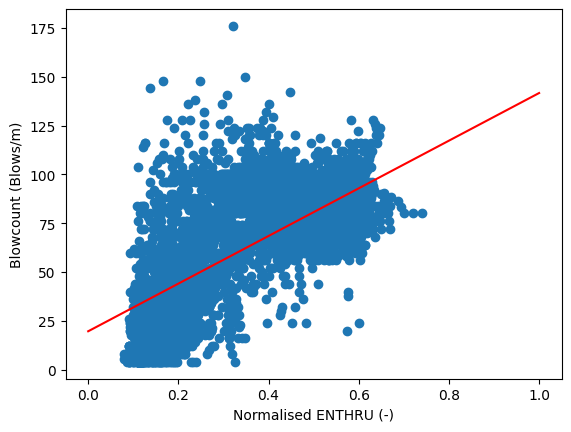

In [15]:
plt.scatter(X, y)
x = np.linspace(0.0, 1, 50)
plt.plot(x, model_1.intercept_ + model_1.coef_ * x, color='red')
plt.xlabel("Normalised ENTHRU (-)")
plt.ylabel("Blowcount (Blows/m)")
plt.show()

In [16]:
model_1.score(X,y)

0.46415658013693784

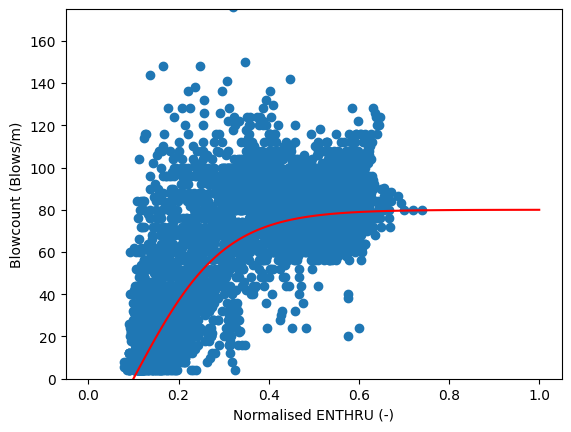

In [17]:
plt.scatter(training_data["Normalised ENTRHU [-]"], training_data["Blowcount [Blows/m]"])
x = np.linspace(0, 1, 100)
plt.plot(x, 80 * np.tanh(5 * x - 0.5), color='red')
plt.xlabel("Normalised ENTHRU (-)")
plt.ylabel("Blowcount (Blows/m)")
plt.ylim([0.0, 175.0])
plt.show()

In [18]:
model_1.score(X,y)

0.46415658013693784

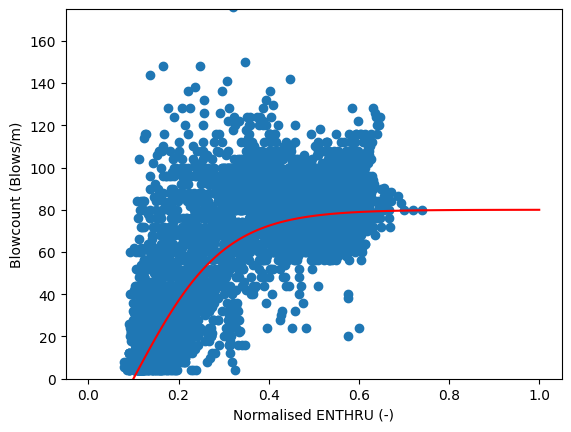

In [19]:
plt.scatter(training_data["Normalised ENTRHU [-]"], training_data["Blowcount [Blows/m]"])
x = np.linspace(0, 1, 100)
plt.plot(x, 80 * np.tanh(5 * x - 0.5), color='red')
plt.xlabel("Normalised ENTHRU (-)")
plt.ylabel("Blowcount (Blows/m)")
plt.ylim([0.0, 175.0])
plt.show()

In [20]:
Xlin = np.tanh(5 * cleaned_training_data[["Normalised ENTRHU [-]"]] - 0.5)

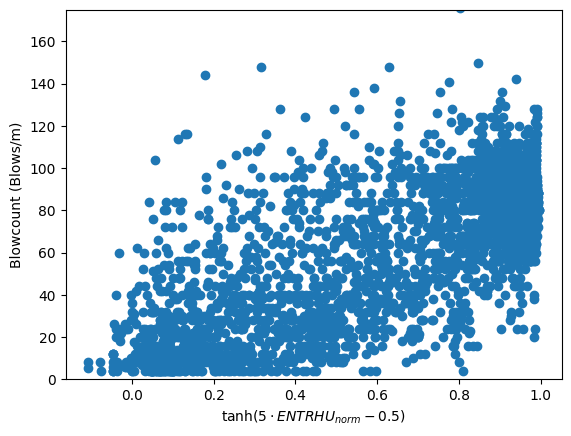

In [ ]:
plt.scatter(Xlin, y)
plt.xlabel(r"$ \tanh(5 \cdot ENTRHU_{norm} - 0.5) $")
plt.ylabel("Blowcount (Blows/m)")
plt.ylim([0.0, 175.0])
plt.show()

In [21]:
model_2 = LinearRegression().fit(Xlin, y)

In [22]:
model_2.coef_, model_2.intercept_

(array([69.81939984]), 14.744456831819186)

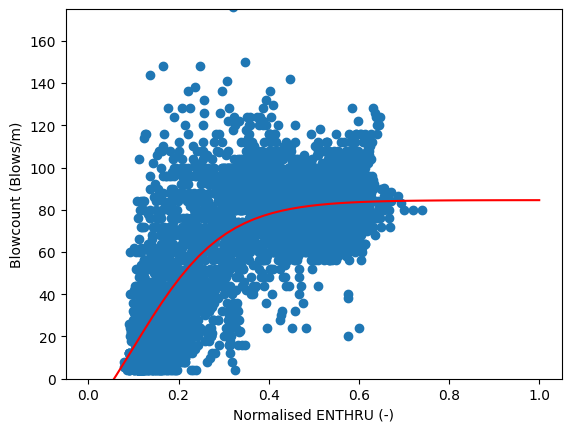

In [23]:
plt.scatter(X, y)
x = np.linspace(0.0, 1, 50)
plt.plot(x, model_2.intercept_ + model_2.coef_ * (np.tanh(5*x - 0.5)), color='red')
plt.xlabel("Normalised ENTHRU (-)")
plt.ylabel("Blowcount (Blows/m)")
plt.ylim([0.0, 175])
plt.show()

In [24]:
model_2.score(Xlin, y)

0.5536524756394534

In [25]:
enhanced_data = pd.DataFrame() # Create a dataframe for the data enhanced with the shaft friction feature
for location in training_data['Location ID'].unique(): # Loop over all unique locations
    locationdata = training_data[training_data['Location ID']==location].copy() # Select the location-specific data
    # Calculate the shaft resistance feature
    locationdata["Rs [kN]"] = \
        (np.pi * locationdata["Diameter [m]"] * locationdata["z [m]"].diff() * locationdata["qc [MPa]"]).cumsum()
    enhanced_data = pd.concat([enhanced_data, locationdata]) # Combine data for the different locations in 1 dataframe

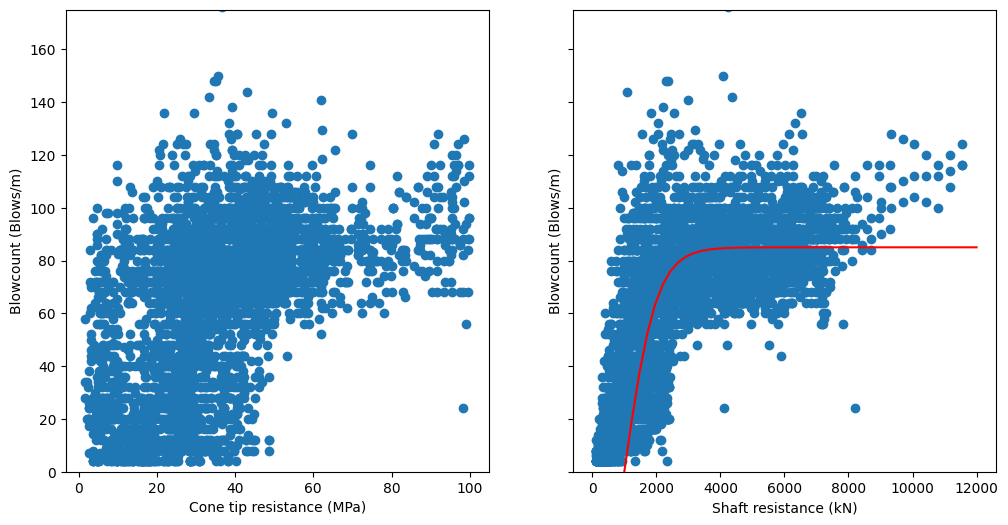

In [26]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, sharey=True, figsize=(12,6))
ax1.scatter(enhanced_data["qc [MPa]"], enhanced_data["Blowcount [Blows/m]"])
ax2.scatter(enhanced_data["Rs [kN]"], enhanced_data["Blowcount [Blows/m]"])
x = np.linspace(0.0, 12000, 50)
ax2.plot(x, 85 * (np.tanh(0.001*x-1)), color='red')
ax1.set_xlabel("Cone tip resistance (MPa)")
ax2.set_xlabel("Shaft resistance (kN)")
ax1.set_ylabel("Blowcount (Blows/m)")
ax2.set_ylabel("Blowcount (Blows/m)")
ax1.set_ylim([0.0, 175])
plt.show()

In [27]:
features = ["Rs [kN]"]
X = enhanced_data.dropna()[features]
y = enhanced_data.dropna()["Blowcount [Blows/m]"]
Xlin = np.tanh((0.001 * X) - 1)

In [28]:
model_3 = LinearRegression().fit(Xlin, y)

In [29]:
model_3.intercept_, model_3.coef_

(36.72043195452285, array([44.5766327]))

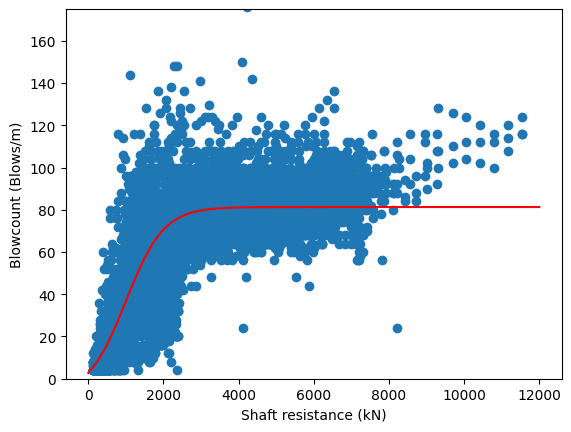

In [30]:
plt.scatter(X, y)
x = np.linspace(0.0, 12000, 50)
plt.plot(x, model_3.intercept_ + model_3.coef_ * (np.tanh(0.001*x - 1)), color='red')
plt.xlabel("Shaft resistance (kN)")
plt.ylabel("Blowcount (Blows/m)")
plt.ylim([0.0, 175])
plt.show()

In [31]:
model_3.score(Xlin, y)

0.6039306763425603

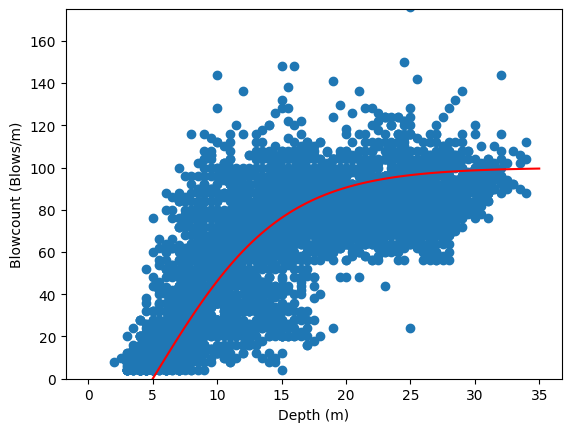

In [32]:
plt.scatter(data["z [m]"], data["Blowcount [Blows/m]"])
z = np.linspace(0,35,100)
plt.plot(z, 100 * np.tanh(0.1 * z - 0.5), color='red')
plt.ylim([0, 175])
plt.xlabel("Depth (m)")
plt.ylabel("Blowcount (Blows/m)")
plt.show()

In [33]:
enhanced_data["linearized ENTHRU"] = np.tanh(5 * enhanced_data["Normalised ENTRHU [-]"] - 0.5)
enhanced_data["linearized Rs"] = np.tanh(0.001 * enhanced_data["Rs [kN]"] - 1)
enhanced_data["linearized z"] = np.tanh(0.1 * enhanced_data["z [m]"] - 0.5)
linearized_features = ["linearized ENTHRU", "linearized Rs", "linearized z"]

In [34]:
X = enhanced_data.dropna()[linearized_features]
y = enhanced_data.dropna()["Blowcount [Blows/m]"]
model_4 = LinearRegression().fit(X,y)

In [35]:
model_4.score(X, y)

0.6226585770981693

In [36]:
model_4.intercept_, model_4.coef_

(24.574230770198675, array([ 2.61421619, 19.8869918 , 39.17286467]))

In [37]:
predictions = model_4.predict(X)
predictions

array([11.30428523, 15.22514248, 19.21447274, ..., 84.47966048,
       84.63940626, 84.78400572])

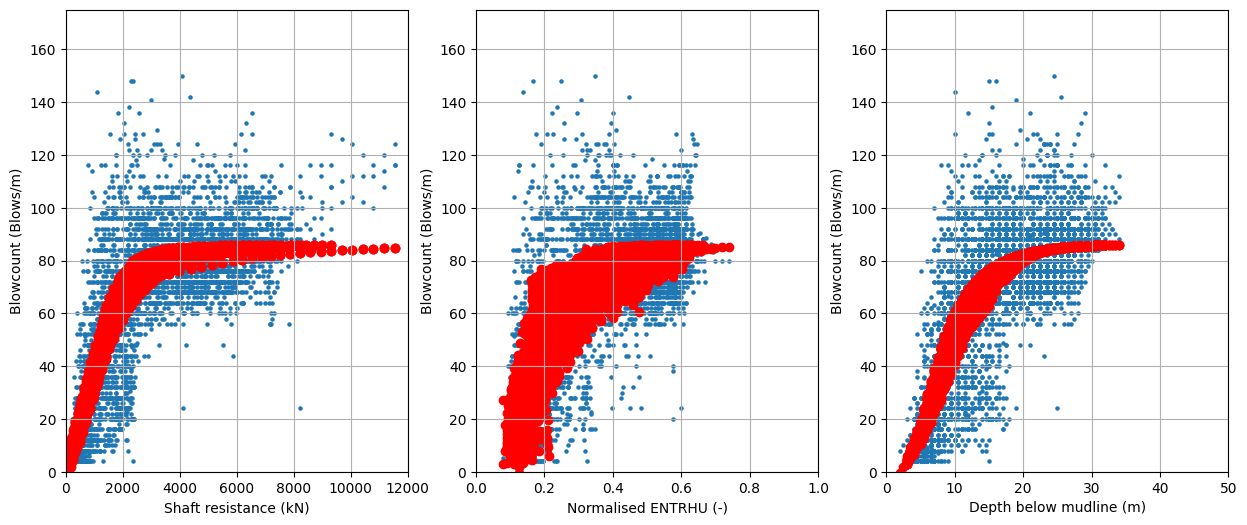

In [38]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15,6))
# Measurements
ax1.scatter(enhanced_data["Rs [kN]"], enhanced_data["Blowcount [Blows/m]"], s=5)
ax2.scatter(enhanced_data["Normalised ENTRHU [-]"], enhanced_data["Blowcount [Blows/m]"], s=5)
ax3.scatter(enhanced_data["z [m]"], enhanced_data["Blowcount [Blows/m]"], s=5)
# Predictions
ax1.scatter(enhanced_data.dropna()["Rs [kN]"], predictions, color='red')
ax2.scatter(enhanced_data.dropna()["Normalised ENTRHU [-]"], predictions, color='red')
ax3.scatter(enhanced_data.dropna()["z [m]"], predictions, color='red')
for ax in (ax1, ax2, ax3):
    ax.grid()
    ax.set_ylim(0, 175)
    ax.set_ylabel(r"Blowcount (Blows/m)")
ax1.set_xlabel(r"Shaft resistance (kN)")
ax1.set_xlim(0, 12000)
ax2.set_xlabel(r"Normalised ENTRHU (-)")
ax2.set_xlim(0, 1)
ax3.set_xlabel(r"Depth below mudline (m)")
ax3.set_xlim(0, 50)
plt.show()

In [39]:
# Create a copy of the dataframe with location-specific data
validation_data_CB = validation_data[validation_data["Location ID"] == "CB"].copy()

In [40]:
# Calculate the shaft resistance feature and put it in the column 'Rs [kN]'
validation_data_CB["Rs [kN]"] = \
    (np.pi * validation_data_CB["Diameter [m]"] * \
     validation_data_CB["z [m]"].diff() * validation_data_CB["qc [MPa]"]).cumsum()

In [41]:
# Calculate linearized ENTHRU, Rs and z
validation_data_CB["linearized ENTHRU"] = np.tanh(5 * validation_data_CB["Normalised ENTRHU [-]"] - 0.5)
validation_data_CB["linearized Rs"] = np.tanh(0.001 * validation_data_CB["Rs [kN]"] - 1)
validation_data_CB["linearized z"] = np.tanh(0.1 * validation_data_CB["z [m]"] - 0.5)

In [42]:
# Create the matrix with n samples and 3 features
X_validation = validation_data_CB.dropna()[linearized_features]
# Create the vector with n observations of blowcount
y_validation = validation_data_CB.dropna()["Blowcount [Blows/m]"]

In [43]:
# Calculate the R2 score for the validation data
model_4.score(X_validation, y_validation)

0.7595697386847182

In [44]:
validation_predictions = model_4.predict(X_validation)

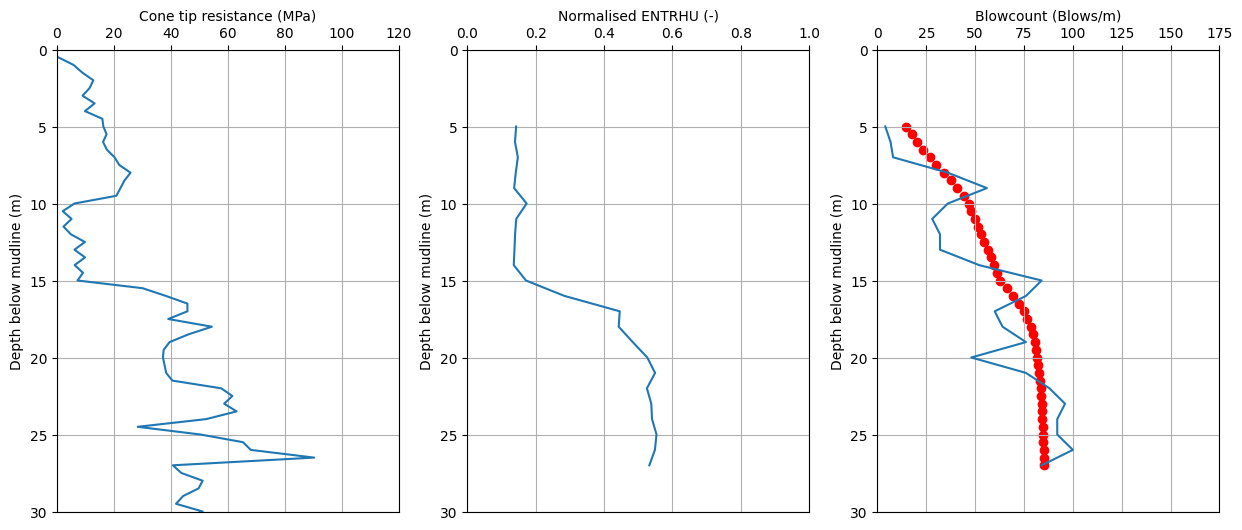

In [45]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15,6))
# All data
ax1.plot(validation_data_CB["qc [MPa]"], validation_data_CB["z [m]"])
ax2.plot(validation_data_CB["Normalised ENTRHU [-]"], validation_data_CB["z [m]"])
ax3.plot(validation_data_CB["Blowcount [Blows/m]"], validation_data_CB["z [m]"])
# Location-specific data
ax3.scatter(validation_predictions, validation_data_CB.dropna()["z [m]"], color='red')
for ax in (ax1, ax2, ax3):
    ax.grid()
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.set_ylim(30, 0)
    ax.set_ylabel(r"Depth below mudline (m)")
ax1.set_xlabel(r"Cone tip resistance (MPa)")
ax1.set_xlim(0, 120)
ax2.set_xlabel(r"Normalised ENTRHU (-)")
ax2.set_xlim(0, 1)
ax3.set_xlabel(r"Blowcount (Blows/m)")
ax3.set_xlim(0, 175)
plt.show()

In [47]:
final_data = pd.read_csv("/content/drive/MyDrive/isfog2020-pile-driving-predictions/validation_data.csv")
final_data.head()

,z [m],qc [MPa],fs [MPa],u2 [MPa],ID,Location ID,Normalised ENTRHU [-],Normalised hammer energy [-],Diameter [m],Bottom wall thickness [mm],Pile penetration [m]
0,0.5,0.8697,0.0075,0.0041,BJ__0_5,BJ,NaN,NaN,2.48,70.0,25.0
1,1.0,3.9027,0.0499,0.0151,BJ__1_0,BJ,NaN,NaN,2.48,70.0,25.0
2,1.5,10.2930,0.0718,0.0115,BJ__1_5,BJ,NaN,NaN,2.48,70.0,25.0
3,2.0,14.3678,0.1428,0.0246,BJ__2_0,BJ,NaN,NaN,2.48,70.0,25.0
4,2.5,16.0034,0.1474,0.0338,BJ__2_5,BJ,NaN,NaN,2.48,70.0,25.0


In [48]:
enhanced_final_data = pd.DataFrame() # Create a dataframe for the final data enhanced with the shaft friction feature
for location in final_data['Location ID'].unique(): # Loop over all unique locations
    locationdata = final_data[final_data['Location ID']==location].copy() # Select the location-specific data
    # Calculate the shaft resistance feature
    locationdata["Rs [kN]"] = \
        (np.pi * locationdata["Diameter [m]"] * locationdata["z [m]"].diff() * locationdata["qc [MPa]"]).cumsum()
    enhanced_final_data = pd.concat(
        [enhanced_final_data, locationdata]) # Combine data for the different locations in 1 dataframe

In [49]:
enhanced_final_data.dropna(inplace=True) # Drop the rows containing NaN values and overwrite the dataframe

In [50]:
enhanced_final_data["linearized ENTHRU"] = np.tanh(5 * enhanced_final_data["Normalised ENTRHU [-]"] - 0.5)
enhanced_final_data["linearized Rs"] = np.tanh(0.001 * enhanced_final_data["Rs [kN]"] - 1)
enhanced_final_data["linearized z"] = np.tanh(0.1 * enhanced_final_data["z [m]"] - 0.5)

In [51]:
# Create the matrix with n samples and 3 features
X = enhanced_final_data[linearized_features]

In [52]:
final_predictions = model_4.predict(X)

In [53]:
enhanced_final_data["Blowcount [Blows/m]"] = final_predictions

In [54]:
enhanced_final_data[["ID", "Blowcount [Blows/m]"]].to_csv("sample_submission_linearmodel.csv", index=False)